In [267]:
import numpy as np
import pandas as pd
from numpy import nan as NA
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns


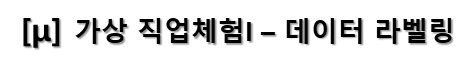

In [340]:
data = pd.read_csv("C:/Users/Affinity/Desktop/study/1차 수행평가/LOG_DATA.csv", header = 0)

In [341]:
data.shape

(43230, 27)

In [343]:
data.info()
# count가 0인 column들은 데이터가 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43230 entries, 0 to 43229
Data columns (total 27 columns):
MASTERLOG_ID      43230 non-null int64
MSG_DATETIME      43230 non-null object
MSG_STATUS        43230 non-null int64
HUB_CNT           43230 non-null int64
SPOKE_CNT         43230 non-null int64
RECV_HUB_CNT      43230 non-null int64
RECV_SPOKE_CNT    43230 non-null int64
ERROR_TYPE        0 non-null float64
ERROR_CNT         43230 non-null int64
REASON_CODE       43230 non-null int64
MSG_TTL           43230 non-null object
MSG_ALERT         43230 non-null object
RECORD_CNT        43230 non-null int64
ADAPTER_CODE      43230 non-null object
RECORD_SIZE       43230 non-null int64
DATA_SIZE         43230 non-null int64
COMPRESS_YN       43230 non-null object
COMPRESS_SIZE     43230 non-null int64
SOURCE_DIR_NM     0 non-null float64
SOURCE_FILE_NM    0 non-null float64
TARGET_DIR_NM     0 non-null float64
TARGET_FILE_NM    0 non-null float64
RECORD_S_CNT      0 non-null float64
R

In [344]:
data.head(10)

,MASTERLOG_ID,MSG_DATETIME,MSG_STATUS,HUB_CNT,SPOKE_CNT,RECV_HUB_CNT,RECV_SPOKE_CNT,ERROR_TYPE,ERROR_CNT,REASON_CODE,...,COMPRESS_SIZE,SOURCE_DIR_NM,SOURCE_FILE_NM,TARGET_DIR_NM,TARGET_FILE_NM,RECORD_S_CNT,RECORD_E_CNT,P_TIME,GLOBAL_ID,RECV_HOST_ID
0,19,20181101000125600000,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:01.8,NaN,NaN
1,19,20181101000143000000,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:08.1,NaN,NaN
2,19,20181101000144700000,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:17.3,NaN,NaN
3,19,20181101000241200000,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:06.8,NaN,NaN
4,19,20181101000248600000,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:10.4,NaN,NaN
5,19,20181101000817200000,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:06.2,NaN,NaN
6,19,20181101000823300000,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:11.0,NaN,NaN
7,19,20181101000955200000,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:13.9,NaN,NaN
8,19,20181101001403800000,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:09.7,NaN,NaN
9,19,20181101001528400000,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:08.9,NaN,NaN


In [345]:
data['P_TIME']
# 출력값은 00:nn이지만 csv파일에는 12:00:nn의 형태
# 따라서 datetime이 아닌 문자처리 방식의 슬라이싱을 통해 라벨링 진행

0        00:01.8
1        00:08.1
2        00:17.3
3        00:06.8
4        00:10.4
5        00:06.2
6        00:11.0
7        00:13.9
8        00:09.7
9        00:08.9
10       00:14.0
11       00:08.1
12       00:11.1
13       00:10.7
14       00:06.6
15       00:17.5
16       00:13.5
17       00:10.7
18       00:11.8
19       00:01.6
20       00:13.4
21       00:09.1
22       00:07.8
23       00:13.1
24       00:10.4
25       00:04.7
26       00:11.0
27       00:13.9
28       00:07.3
29       00:10.4
          ...   
43200    00:08.2
43201    00:13.2
43202    00:19.8
43203    00:20.7
43204    00:12.5
43205    00:22.0
43206    00:19.1
43207    00:29.7
43208    00:21.8
43209    00:02.8
43210    00:10.0
43211    00:17.7
43212    00:10.1
43213    00:16.1
43214    00:24.2
43215    00:18.0
43216    00:28.3
43217    00:20.8
43218    00:19.8
43219    00:17.4
43220    00:23.1
43221    00:21.4
43222    00:15.1
43223    00:21.6
43224    00:14.9
43225    00:26.5
43226    00:19.6
43227    00:22

In [346]:
a = list(data['P_TIME'])
confirm = []
for i  in a:
    b = i[:3]
    confirm.append(b)

pd.Series(confirm).unique()

# 01:, 02: 등은 없고 모두 00:
# 따라서 00:뒤의 숫자만 확인하면 됨.

array(['00:'], dtype=object)

In [347]:
#aaa = []
#for i in data['P_TIME']:
#    aaa.append(i[3:])

#lst = pd.Series(aaa).astype('float')
# 이런식으로 데이터 형식을 바꾼 후에 20이 넘는지 확인하여도 되고

# 밑에 처럼 원소마다 float화 하여 비교하여도 됨.
label = []
for i in data['P_TIME']:
    if np.float(i[3:]) > 20:
        label.append(0)
    else:
        label.append(1)
            
label

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [349]:
pd.Series(label).sum() / pd.Series(label).count()
# list로는 sum과 count가 불가능하여 Series형태로 변환 후 진행
# error가 아닌(<20) 데이터의 비율 확인

0.9833680314596345

In [350]:
# 원본 데이터 프레임에 'P_TIME_LABEL'이라는 열을 추가하여 라벨 데이터 추가
data['P_TIME_LABEL'] = label
data.head()

,MASTERLOG_ID,MSG_DATETIME,MSG_STATUS,HUB_CNT,SPOKE_CNT,RECV_HUB_CNT,RECV_SPOKE_CNT,ERROR_TYPE,ERROR_CNT,REASON_CODE,...,SOURCE_DIR_NM,SOURCE_FILE_NM,TARGET_DIR_NM,TARGET_FILE_NM,RECORD_S_CNT,RECORD_E_CNT,P_TIME,GLOBAL_ID,RECV_HOST_ID,P_TIME_LABEL
0,19,20181101000125600000,0,0,1,1,1,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,00:01.8,NaN,NaN,1
1,19,20181101000143000000,0,0,1,1,1,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,00:08.1,NaN,NaN,1
2,19,20181101000144700000,0,0,1,1,1,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,00:17.3,NaN,NaN,1
3,19,20181101000241200000,0,0,1,1,1,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,00:06.8,NaN,NaN,1
4,19,20181101000248600000,0,0,1,1,1,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,00:10.4,NaN,NaN,1


In [273]:
# 라벨링 확인이 편하게 data set의 columns을 출력한 후
# (복붙을 통해) 가장 뒤에 있던 P_TIME_LABEL을 P_TIME 옆으로 이동
print(data.columns)
data.columns = ['MASTERLOG_ID', 'MSG_DATETIME', 'MSG_STATUS', 'HUB_CNT', 'SPOKE_CNT',
       'RECV_HUB_CNT', 'RECV_SPOKE_CNT', 'ERROR_TYPE', 'ERROR_CNT',
       'REASON_CODE', 'MSG_TTL', 'MSG_ALERT', 'RECORD_CNT', 'ADAPTER_CODE',
       'RECORD_SIZE', 'DATA_SIZE', 'COMPRESS_YN', 'COMPRESS_SIZE',
       'SOURCE_DIR_NM', 'SOURCE_FILE_NM', 'TARGET_DIR_NM', 'TARGET_FILE_NM',
       'RECORD_S_CNT', 'RECORD_E_CNT', 'P_TIME', 'P_TIME_LABEL', 'GLOBAL_ID', 'RECV_HOST_ID']
data.info()

Index(['MASTERLOG_ID', 'MSG_DATETIME', 'MSG_STATUS', 'HUB_CNT', 'SPOKE_CNT',
       'RECV_HUB_CNT', 'RECV_SPOKE_CNT', 'ERROR_TYPE', 'ERROR_CNT',
       'REASON_CODE', 'MSG_TTL', 'MSG_ALERT', 'RECORD_CNT', 'ADAPTER_CODE',
       'RECORD_SIZE', 'DATA_SIZE', 'COMPRESS_YN', 'COMPRESS_SIZE',
       'SOURCE_DIR_NM', 'SOURCE_FILE_NM', 'TARGET_DIR_NM', 'TARGET_FILE_NM',
       'RECORD_S_CNT', 'RECORD_E_CNT', 'P_TIME', 'GLOBAL_ID', 'RECV_HOST_ID',
       'P_TIME_LABEL'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43230 entries, 0 to 43229
Data columns (total 28 columns):
MASTERLOG_ID      43230 non-null int64
MSG_DATETIME      43230 non-null object
MSG_STATUS        43230 non-null int64
HUB_CNT           43230 non-null int64
SPOKE_CNT         43230 non-null int64
RECV_HUB_CNT      43230 non-null int64
RECV_SPOKE_CNT    43230 non-null int64
ERROR_TYPE        0 non-null float64
ERROR_CNT         43230 non-null int64
REASON_CODE       43230 non-null int64
MSG_TTL      


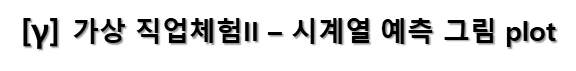

    - 제공해주신 blog를 토대로 수행하였습니다.

In [303]:
import datetime
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [351]:
data.MSG_DATETIME
# 앞부분부터 yyyymmdd인점 확인
# 8자리 이후 데이터는 자릿수의 문제로 시간이 아니라 판단했으며
# IP주소, 로그인위치 좌표, ID 고유번호 등 가능성이 많음
# 날짜만을 이용할 것이기때문에 8자리 이후 숫자는 제거 후 진행

0        20181101000125600000 
1        20181101000143000000 
2        20181101000144700000 
3        20181101000241200000 
4        20181101000248600000 
5        20181101000817200000 
6        20181101000823300000 
7        20181101000955200000 
8        20181101001403800000 
9        20181101001528400000 
10       20181101001618400000 
11       20181101001624600000 
12       20181101001642700000 
13       20181101001657100000 
14       20181101002122300000 
15       20181101002351300000 
16       20181101002407400000 
17       20181101002509500000 
18       20181101002820200000 
19       20181101002833300000 
20       20181101002937000000 
21       20181101003131400000 
22       20181101003142400000 
23       20181101003220300000 
24       20181101003400800000 
25       20181101003443900000 
26       20181101003445000000 
27       20181101003547400000 
28       20181101003549200000 
29       20181101004137300000 
                 ...          
43200    20181130233211100000 
43201   

In [276]:
data.MSG_DATETIME.isnull().sum()
# 먼저 누락된 값이(NaN) 있는지 확인

0

In [277]:
convert = []
for i in data.MSG_DATETIME:
    convert.append(datetime.datetime.strptime(i[:8], "%Y%m%d").date().isoformat())
convert

['2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-01',
 '2018-11-

In [278]:
data['MSG_DATETIME_convert'] = convert
data.head()

,MASTERLOG_ID,MSG_DATETIME,MSG_STATUS,HUB_CNT,SPOKE_CNT,RECV_HUB_CNT,RECV_SPOKE_CNT,ERROR_TYPE,ERROR_CNT,REASON_CODE,...,SOURCE_FILE_NM,TARGET_DIR_NM,TARGET_FILE_NM,RECORD_S_CNT,RECORD_E_CNT,P_TIME,P_TIME_LABEL,GLOBAL_ID,RECV_HOST_ID,MSG_DATETIME_convert
0,19,20181101000125600000,0,0,1,1,1,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,00:01.8,NaN,NaN,1,2018-11-01
1,19,20181101000143000000,0,0,1,1,1,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,00:08.1,NaN,NaN,1,2018-11-01
2,19,20181101000144700000,0,0,1,1,1,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,00:17.3,NaN,NaN,1,2018-11-01
3,19,20181101000241200000,0,0,1,1,1,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,00:06.8,NaN,NaN,1,2018-11-01
4,19,20181101000248600000,0,0,1,1,1,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,00:10.4,NaN,NaN,1,2018-11-01


In [293]:
x_data = []
for i in data['P_TIME']:
    x_data.append(np.float(i[3:]))
# 과제1에서 진행했던 P_TIME에서 모든 원소가 00: 까지는 같다는 것을 unique()로 확인 하였음
# 따라서 00: 뒤에 지연시간, 또는 처리 시간으로 추정되는 숫자가 유의한 의미를 가지고 있을 것으로 추정

In [310]:
convert = []
for i in data.MSG_DATETIME:
    convert.append(datetime.datetime.strptime(i[:8], "%Y%m%d"))
convert

[datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 

In [365]:
prophet_df = pd.DataFrame({'ds' : convert,
                           'y' : x_data})

In [353]:
prophet_df.head()

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,ds,y
0,2018-11-01,0.587787
1,2018-11-01,2.091864
2,2018-11-01,2.850707
3,2018-11-01,1.916923
4,2018-11-01,2.341806


In [361]:
prophet_df['y'].min()
# prophet_df['y'] = np.log(prophet_df['y'])
# 0인 데이터가 있어 log를 취하면 무한대값이 생김

0.0

infinity를 제거함

In [360]:
prophet_df['y'].max()
# 변동이 크지 않아 log를 취하지 않고 그대로 진행

39.3

In [354]:
prophet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43230 entries, 0 to 43229
Data columns (total 2 columns):
ds    43230 non-null datetime64[ns]
y     43230 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 675.5 KB


In [366]:
m = Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [367]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
43590,2019-11-26
43591,2019-11-27
43592,2019-11-28
43593,2019-11-29
43594,2019-11-30


In [368]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
43590,2019-11-26,785.075711,-10188.135205,11101.666032
43591,2019-11-27,785.325778,-10218.549335,11127.915074
43592,2019-11-28,786.563754,-10242.586801,11162.561092
43593,2019-11-29,793.298950,-10284.265633,11247.551107
43594,2019-11-30,797.053949,-10330.441052,11355.283833


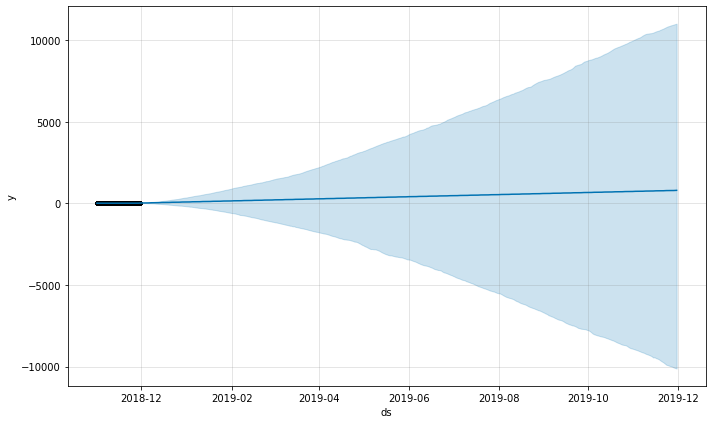

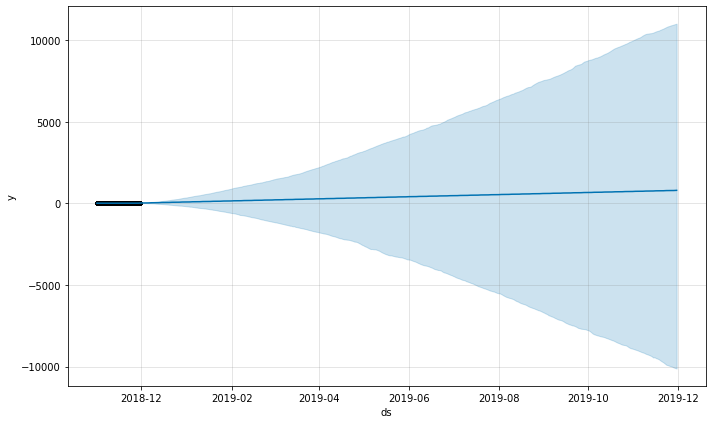

In [332]:
m.plot(forecast)

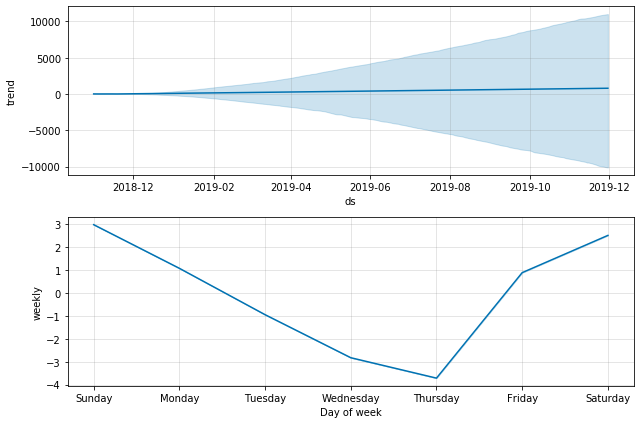

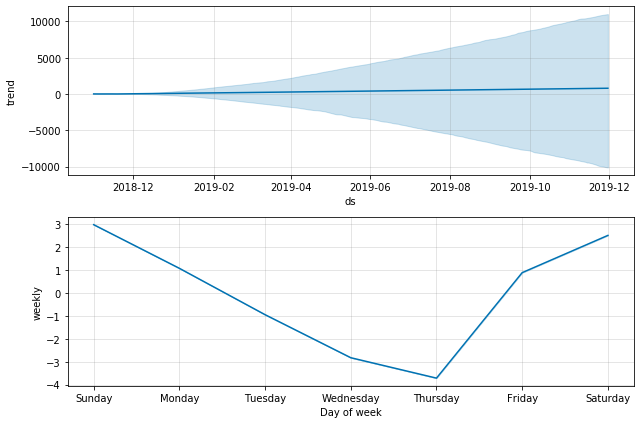

In [329]:
m.plot_components(forecast)


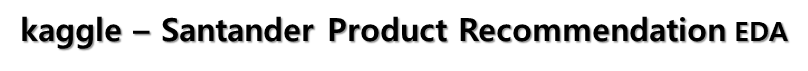

In [377]:
# 데이터 다운 완료 시각 : 17:10 ..........

In [378]:
SPR = pd.read_csv("C:/Users/Affinity/Desktop/study/1차 수행평가/train_ver2.csv", header = 0)

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [379]:
SPR.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [380]:
SPR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
fecha_dato               object
ncodpers                 int64
ind_empleado             object
pais_residencia          object
sexo                     object
age                      object
fecha_alta               object
ind_nuevo                float64
antiguedad               object
indrel                   float64
ult_fec_cli_1t           object
indrel_1mes              object
tiprel_1mes              object
indresi                  object
indext                   object
conyuemp                 object
canal_entrada            object
indfall                  object
tipodom                  float64
cod_prov                 float64
nomprov                  object
ind_actividad_cliente    float64
renta                    float64
segmento                 object
ind_ahor_fin_ult1        int64
ind_aval_fin_ult1        int64
ind_cco_fin_ult1         int64
ind_cder_fin_ult1  

In [381]:
SPR.describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07,1.364731e+07,1.364731e+07,1.364731e+07,...,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.363125e+07,1.363125e+07,1.364731e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05,1.022912e-04,2.315475e-05,6.554837e-01,...,5.886582e-03,9.170965e-03,2.627404e-03,5.253636e-02,4.438868e-02,2.560761e-02,3.847718e-03,5.472434e-02,5.942854e-02,1.279162e-01
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05,1.011340e-02,4.811883e-03,4.752103e-01,...,7.649791e-02,9.532502e-02,5.119083e-02,2.231060e-01,2.059571e-01,1.579616e-01,6.191053e-02,2.274414e-01,2.364250e-01,3.339965e-01
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [382]:
SPR.isnull().sum()

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

여기까지만하고 메일보냄